In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

from copy import copy
from matplotlib.colors import LogNorm
#from matplotlib import gridspec
from matplotlib.ticker import AutoMinorLocator

from process_functions import *

from matplotlib import style
style.use('/global/home/users/ftoralesacosta/dotfiles/scientific.mplstyle')
colors = ['#348ABD','#C70039','#FF5733','#FFC300','#65E88F','#40E0D0']

## Load Processed Data

In [2]:
#Data Unfolded From Django
cuts       = np.load('cuts.npy')
jet_pT     = np.load('jet_pT.npy')[cuts]
q_perp     = np.load('q_perp.npy')[cuts]
asymm_phi  = np.load('asymm_angle.npy')[cuts]
weights    = np.load('weights.npy')[cuts]
mc_weights = np.load("mc_weights.npy")[cuts]
nn_weights = np.load("nn_weights.npy")[cuts]

In [3]:
#Data Unfolded From Rapgap
cuts_h1rpgp       = np.load('from_rapgap_cuts.npy')
jet_pT_h1rpgp     = np.load('from_rapgap_jet_pT.npy')[cuts_h1rpgp]
q_perp_h1rpgp     = np.load('from_rapgap_q_perp.npy')[cuts_h1rpgp]
asymm_phi_h1rpgp  = np.load('from_rapgap_asymm_angle.npy')[cuts_h1rpgp]
weights_h1rpgp    = np.load('from_rapgap_weights.npy')[cuts_h1rpgp]
mc_weights_h1rpgp = np.load("from_rapgap_mc_weights.npy")[cuts_h1rpgp]
nn_weights_h1rpgp = np.load("from_rapgap_nn_weights.npy")[cuts_h1rpgp]


In [21]:
#Make Dictionaries and Binning
#N_Bins = 10
q_max = 10.0
q_perp_bins = np.array([ 0., 1., 2., 3., 4., 5., 6., 8., 10.])
N_Bins = len(q_perp_bins)-1
digits = np.digitize(q_perp,q_perp_bins)-1
keys=["q_perp","phi","cos1","cos2","cos3"]

phi_bins = np.linspace(0,3.1416,8)

## Look at $\phi$ Distributions _inside_ $q_\perp$ bins.

In [22]:
h1_rpgp_phi = {}
h1_djgo_phi = {}
rpgp_phi = {}
djgo_phi = {}

phi_inside_qperp(h1_rpgp_phi, q_perp_bins, phi_bins, q_perp_h1rpgp ,asymm_phi_h1rpgp, weights_h1rpgp)
phi_inside_qperp(rpgp_phi, q_perp_bins, phi_bins, q_perp_h1rpgp ,asymm_phi_h1rpgp, mc_weights_h1rpgp)
phi_inside_qperp(h1_djgo_phi, q_perp_bins, phi_bins, q_perp ,asymm_phi, weights)
phi_inside_qperp(djgo_phi, q_perp_bins, phi_bins, q_perp ,asymm_phi, mc_weights)

Text(0.5, 0.98, '$\\phi$ Distributions')

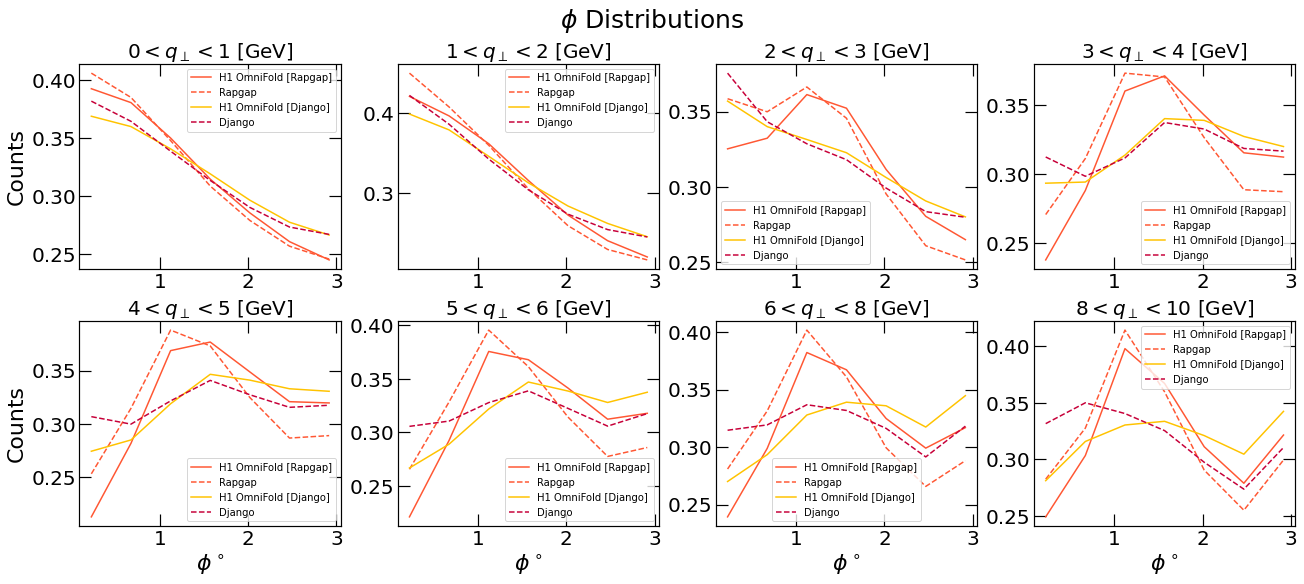

In [28]:
fig, axes = plt.subplots(nrows=2,ncols=4,figsize=(18,8),constrained_layout=True)
axes = axes.ravel()
for i,ax in enumerate(axes):
    ax.plot(h1_rpgp_phi["bin_centers"],h1_rpgp_phi[str(i)],color=colors[2],label="H1 OmniFold [Rapgap]")
    ax.plot(rpgp_phi["bin_centers"],rpgp_phi[str(i)],color=colors[2],linestyle="--",label="Rapgap")
    ax.plot(h1_djgo_phi["bin_centers"],h1_djgo_phi[str(i)],color=colors[3],label="H1 OmniFold [Django]")
    ax.plot(djgo_phi["bin_centers"],djgo_phi[str(i)],colors[1],linestyle="--",label="Django")
    ax.legend(fontsize=10)
    
    if (i%4==0):
        ax.set_ylabel("Counts")
    if (i>3):
        ax.set_xlabel("$\phi^\circ$")
    ax.set_title("$%i < q_\perp < %i$ [GeV]"%(q_perp_bins[i],q_perp_bins[i+1]),fontsize=20)
    
plt.suptitle("$\phi$ Distributions",fontsize=25)

## Look at Original Intended Observable: Asymmetries

In [13]:
h1_djgo = {}
django = {}
h1_rpgp = {}
rapgap = {}

averages_in_qperp_bins(h1_djgo, q_perp_bins, q_perp, asymm_phi,weights)
averages_in_qperp_bins(django, q_perp_bins, q_perp, asymm_phi,mc_weights)
averages_in_qperp_bins(h1_rpgp, q_perp_bins, q_perp_h1rpgp, asymm_phi_h1rpgp,weights_h1rpgp)
averages_in_qperp_bins(rapgap, q_perp_bins, q_perp_h1rpgp, asymm_phi_h1rpgp,mc_weights_h1rpgp)

Keys = dict_keys(['q_perp', 'phi', 'cos1', 'cos2', 'sin1', 'cos3']) N_Bins =  8
Keys = dict_keys(['q_perp', 'phi', 'cos1', 'cos2', 'sin1', 'cos3']) N_Bins =  8
Keys = dict_keys(['q_perp', 'phi', 'cos1', 'cos2', 'sin1', 'cos3']) N_Bins =  8
Keys = dict_keys(['q_perp', 'phi', 'cos1', 'cos2', 'sin1', 'cos3']) N_Bins =  8


# Errors

In [14]:
file = open('bootstrap_errors.pkl', 'rb')
bootstrap_errors = pickle.load(file)
file.close()

In [15]:
file = open('systematics.pkl', 'rb')
systematics = pickle.load(file)
file.close()

In [16]:
stat_and_sys_error = {}
for key in keys[1:]:
    stat_and_sys_error[key] = np.sqrt((bootstrap_errors[key]*h1_rpgp[key])**2+systematics['total'][key]**2)

In [17]:
x_low =  h1_rpgp["q_perp"] - q_perp_bins[:-1]
x_high = q_perp_bins[1:] - h1_rpgp["q_perp"]
x_errors = np.array(list(zip(x_low,x_high))).T
edges=np.stack((q_perp_bins[:-1],q_perp_bins[1:])).T

# Plot

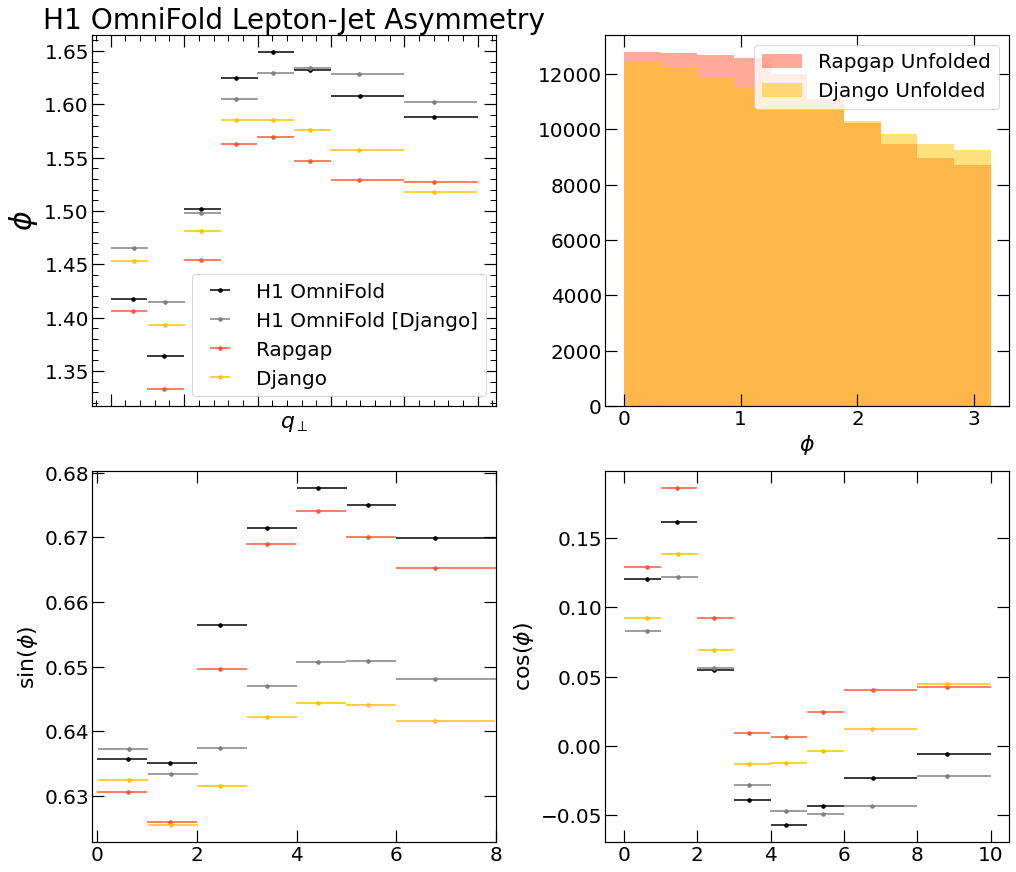

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12), constrained_layout=True)
x_max = 8.0
axes = np.ravel(axes)

#Phi Vs. qT
axes[0].errorbar(h1_rpgp["q_perp"],h1_rpgp["phi"],xerr=x_errors,
                         label="H1 OmniFold",ls='none',ms=7,marker=".", color='black')
axes[0].errorbar(h1_djgo["q_perp"],h1_djgo["phi"],xerr=x_errors,
                         label="H1 OmniFold [Django]",ls='none',ms=7,marker=".",color='grey')

axes[0].errorbar(rapgap["q_perp"],rapgap["phi"],xerr=x_errors,
                         label="Rapgap",ls='none',ms=7,marker=".", color=colors[2])
axes[0].errorbar(django["q_perp"],django["phi"],xerr=x_errors,
                         label="Django",ls='none',ms=7,marker=".",color=colors[3])
axes[0].legend()
axes[0].set_title("H1 OmniFold Lepton-Jet Asymmetry")
axes[0].set_xlabel("$q_\perp$")
axes[0].set_ylabel("$\phi$",fontsize=30)
axes[0].axes.set_xticklabels("")
axes[0].yaxis.set_minor_locator(AutoMinorLocator(5))
axes[0].xaxis.set_minor_locator(AutoMinorLocator(5))

#Phi Hishogrom
axes[1].hist(asymm_phi_h1rpgp,weights=weights_h1rpgp,color=colors[2],alpha=0.5,label="Rapgap Unfolded")
axes[1].hist(asymm_phi,weights=weights,color=colors[3],alpha=0.5,label="Django Unfolded")
axes[1].legend()
axes[1].set_xlabel("$\phi$")

#SIN
axes[2].errorbar(h1_rpgp["q_perp"],h1_rpgp["sin1"],xerr=x_errors,
                         label="H1 OmniFold [Rapgap]",ls='none',ms=7,marker=".", color='black')
axes[2].errorbar(h1_djgo["q_perp"],h1_djgo["sin1"],xerr=x_errors,
                         label="H1 OmniFold [Django]",ls='none',ms=7,marker=".",color='grey')

axes[2].errorbar(rapgap["q_perp"],rapgap["sin1"],xerr=x_errors,
                         label="H1 OmniFold",ls='none',ms=7,marker=".", color=colors[2])
axes[2].errorbar(django["q_perp"],django["sin1"],xerr=x_errors,
                         label="H1 OmniFold [Django]",ls='none',ms=7,marker=".",color=colors[3])

axes[2].set_xlim(-0.1,x_max)
axes[2].set_ylabel("$\sin(\phi)$")

#COS
axes[3].errorbar(h1_rpgp["q_perp"],h1_rpgp["cos1"],xerr=x_errors,
                         label="H1 OmniFold",ls='none',ms=7,marker=".", color='black')
axes[3].errorbar(h1_djgo["q_perp"],h1_djgo["cos1"],xerr=x_errors,
                         label="H1 OmniFold [Django]",ls='none',ms=7,marker=".",color='grey')

axes[3].errorbar(rapgap["q_perp"],rapgap["cos1"],xerr=x_errors,
                         label="H1 OmniFold",ls='none',ms=7,marker=".", color=colors[2])
axes[3].errorbar(django["q_perp"],django["cos1"],xerr=x_errors,
                         label="H1 OmniFold [Django]",ls='none',ms=7,marker=".",color=colors[3])
axes[3].set_ylabel("$\cos(\phi)$")

plt.savefig("phi.pdf")